# 🎓 **CS331 <span style="color:#008080;"> PA 2 Part 1 — Predicting Car Fuel Efficiency with Linear Regression</span>**  

In this assignment, you’ll put your Machine Learning to test and build a <span style="color:#008080;">Linear Regression model</span> to find out what is making your car use so much fuel! Your task is to use **relevant selected car features** such as <span style="color:#f4a261;">engine horsepower</span> or the <span style="color:#6baed6;">car’s weight</span> to predict **MPG (miles per gallon)** — turning engine specs and car stats into _knobs_ (class reference, iykyk).

### General instructions
* Follow along with the notebook, filling out the necessary code where instructed.
*   Use separate training and testing data.
* <span style="color: red;">Make sure to run all cells for credit.</span>
* <span style="color: red;">Do not remove any pre-written code.</span> 
* <span style="color: red;">You must attempt all parts.</span> Do not assume that because something is for 0 marks, you can leave it - it will definitely be used in later parts.
* <span style="color: red;">Do not use unauthorized libraries.</span> You are not allowed to use `sklearn` for anything except train-test split.

**Allowed Libraries:**
*   Section 1 (from scratch): only `numpy`, `scipy`, `pandas`, `matplotlib`. You may only use `sklearn.model_selection.train_test_split` in this section; no other scikit-learn.
*   Section 2: you must use scikit-learn (details later).

## Auto MPG Dataset
This dataset provides characteristics of various cars from different model years and manufacturers, focusing on performance, design, and efficiency. The dataset contains 398 entries, each representing a car model, with features that correlate with a continuous Miles Per Gallon (MPG) score, which is the primary target variable.
The dataset was collected during the late 1970s and early 1980s, a time when fuel efficiency became a critical concern due to global oil crises.

**Features**



*  <span style="color:#6baed6;">MPG (miles per gallon):</span> A continuous variable representing the fuel efficiency of the car. This is the main target feature, with higher values indicating better efficiency.
* <span style="color:#6baed6;">Cylinders:</span> The number of cylinders in the engine. Cars with more cylinders tend to have higher power but lower fuel efficiency.  
*  <span style="color:#6baed6;">Displacement (cu in):</span> Engine displacement measured in cubic inches. Larger displacement generally indicates a more powerful engine but reduced MPG.
*  <span style="color:#6baed6;">Horsepower:</span> Engine power measured in horsepower. Higher horsepower can increase performance but often reduces fuel efficiency.
*  <span style="color:#6baed6;">Weight (lbs):</span> The weight of the car in pounds. Heavier cars usually consume more fuel, leading to lower MPG.
*  <span style="color:#6baed6;">Acceleration (0–60 mph in seconds):</span> The time taken for the car to accelerate from 0 to 60 miles per hour. Cars with lower acceleration times are faster but may sacrifice efficiency.


Start by importing the required libraries:

In [709]:
# Allowed everywhere
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For 3D plots
from mpl_toolkits.mplot3d import Axes3D

DATA_PATH = "auto-mpg.csv"  # change if needed

# **Section 1**: Implementation from Scratch (70 Marks)
## 1. (EDA: Exploratory Data Analysis) (10 Marks)

### A. Data Loading & Cleaning
- Load the dataset into a pandas DataFrame.
- Convert the `"horsepower"` column to numeric (`pd.to_numeric(..., errors='coerce')`) so that `"?"` entries become `NaN`.
- Handle missing values (either drop rows with `NaN` or impute using mean/median).
- Keep only the relevant numeric columns for analysis.

### B. Scatter Plots
Create scatter plots of `mpg` vs:
- `weight`
- `horsepower`
- `displacement`
- `acceleration`
- `cylinders`
- `model year`

Each plot helps visualize how fuel efficiency (mpg) changes with respect to other variables.


### C. Feature Selection (3 features for modeling)


      mpg  cylinders  displacement horsepower  weight
0    18.0          8         307.0        130    3504
1    15.0          8         350.0        165    3693
2    18.0          8         318.0        150    3436
3    16.0          8         304.0        150    3433
4    17.0          8         302.0        140    3449
..    ...        ...           ...        ...     ...
393  27.0          4         140.0         86    2790
394  44.0          4          97.0         52    2130
395  32.0          4         135.0         84    2295
396  28.0          4         120.0         79    2625
397  31.0          4         119.0         82    2720

[398 rows x 5 columns]
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
dtype: object


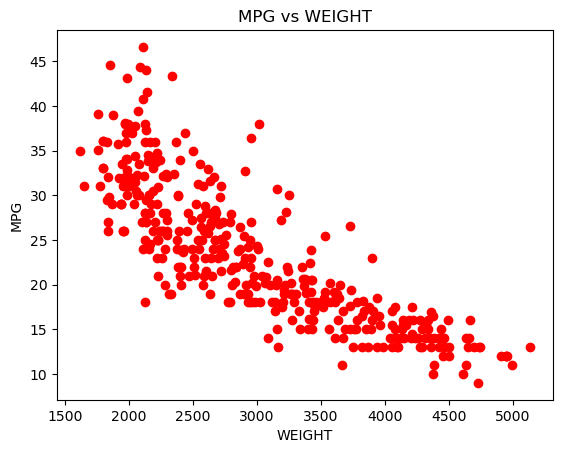

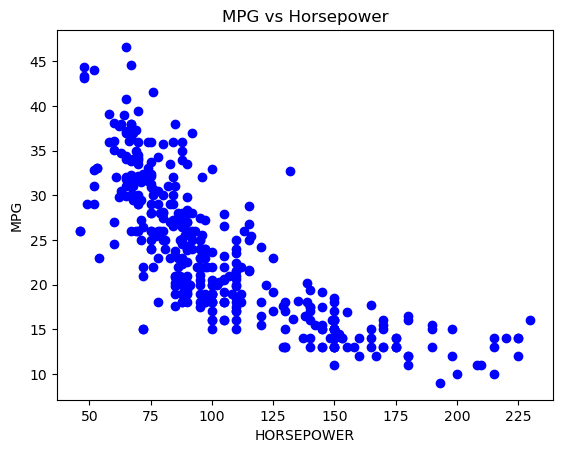

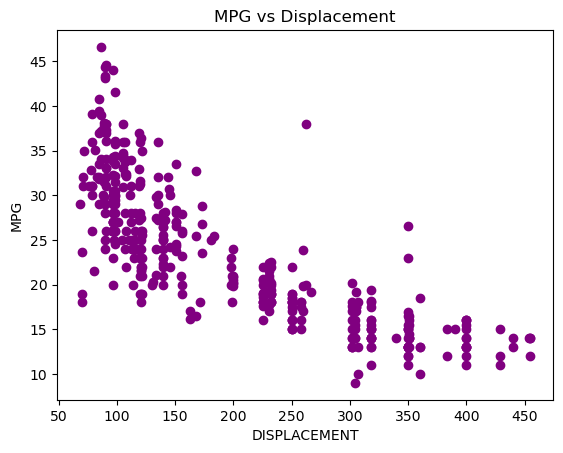

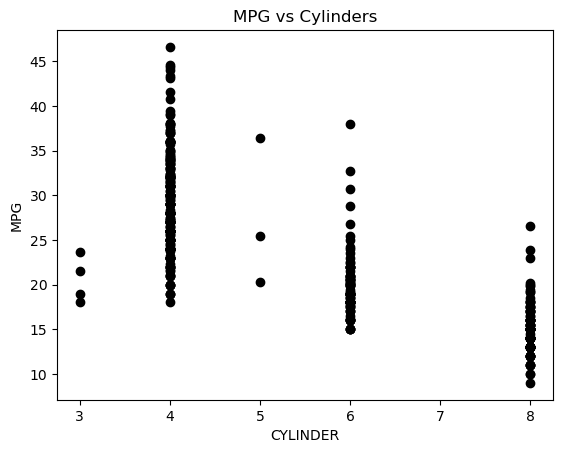

Chosen features: ['cylinders', 'weight', 'horsepower']


In [710]:
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Load & clean
carFeatureData=pd.read_csv("auto-mpg.csv")  #load data into a Dataframe
print(carFeatureData) #visualising what it looks like

column_Horsepower=carFeatureData["horsepower"]
carFeatureData["horsepower"]=pd.to_numeric(carFeatureData["horsepower"],errors='coerce') #horsepower was object, need to convert to numerical

carFeatureData=carFeatureData.dropna() #drop the incomplete rows

printable_types=carFeatureData.dtypes
print(printable_types) #printing what the types the columns are


# TODO: Scatter plots of mpg vs candidate features

# scatter plot: mpg vs weigth
plt.scatter(carFeatureData["weight"],carFeatureData["mpg"],c='red')
plt.title("MPG vs WEIGHT")
plt.xlabel("WEIGHT")
plt.ylabel("MPG")
plt.show()

#scatter plot: mpg vs horsepower
plt.scatter(carFeatureData["horsepower"],carFeatureData["mpg"],c='blue')
plt.title("MPG vs Horsepower")
plt.ylabel("MPG")
plt.xlabel("HORSEPOWER")
plt.show()

# scatterplot: mpg vs displacement
plt.scatter(carFeatureData["displacement"],carFeatureData["mpg"],c='purple')
plt.title("MPG vs Displacement")
plt.xlabel("DISPLACEMENT")
plt.ylabel("MPG")
plt.show()

#scatter plot: mpg vs acceleration
# --> not present in dataset


#scatter plot: mpg vs cylinders
plt.scatter(carFeatureData["cylinders"],carFeatureData["mpg"],c='black')
plt.title("MPG vs Cylinders")
plt.ylabel("MPG")
plt.xlabel("CYLINDER")
plt.show()



# TODO: Choose your three features based on EDA
features =["cylinders", "weight", "horsepower"]  # edit after EDA
print("Chosen features:", features)

## 2. Normalizing Data (10 Marks)

### Why Standardization?
Standardization (z-score normalization) transforms each feature so that:
- Mean = 0  
- Standard Deviation = 1  

This ensures:
- Gradient descent is more stable and converges faster.  
- Features measured on different scales (e.g., horsepower vs. weight) become comparable.  
- Regularization (L1/L2 penalties) treats features fairly instead of being dominated by large-scale features.  

### Implementation

We implement a custom **StandardScaler** class with two methods:

#### A. `fit(X)`
- Compute the mean and standard deviation **only on the training set**.  
- Store these values for later use.  

#### B. `transform(X)`
- Use the stored training statistics to normalize each feature.  
- This means: for every feature, subtract its training mean and divide by its training standard deviation.  
- In this way, all features are rescaled to have mean 0 and standard deviation.

In [711]:
import numpy as np

class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):

        # horsepower
        self.ttl_hp=0
        self.mean_hp=0
        self.number_hp=0
        for hp in X["horsepower"]:
            self.ttl_hp=self.ttl_hp+hp
            self.number_hp=self.number_hp+1
        self.mean_hp=self.ttl_hp/self.number_hp
        self.devv_hp=np.std(X["horsepower"]) # sd using numpy

        # for cylinders but using numpy
        self.meann_cylinder=np.mean(X["cylinders"])
        self.devv_cylinders=np.std(X["cylinders"])

        # for weight but using numpy as well
        self.meann_weight=np.mean(X['weight'])
        self.devv_weight=np.std(X["weight"])

        print(self.meann_cylinder)

        
    def transform(self, X):
        self.normalisationHP=[]
        self.normalisationCY=[]
        self.normalisationW=[]

        for hp in X["horsepower"]:
            self.val=(hp - self.mean_hp)/self.devv_hp
            self.normalisationHP.append(self.val)

        for weighh in X["weight"]:
            self.val=(weighh-self.meann_weight)/self.devv_weight
            self.normalisationW.append(self.val)
        
        for CY in X["cylinders"]:
            self.val=(CY-self.meann_cylinder)/self.devv_cylinders
            self.normalisationCY.append(self.val)

        dataset_normalisedData=np.column_stack([self.normalisationHP, self.normalisationCY, self.normalisationW])
        print(dataset_normalisedData)
        return dataset_normalisedData

        

## 3. Train/Test Split and Standardize (5 Marks)

### Train/Test Split (60/40)
We split the dataset into two parts:
- **60% training data** → used to fit the model and scaler.  
- **40% test data** → held out for final evaluation.  

This is done with a single call to `train_test_split`.

To ensure all features are on the same scale:
- We **fit the scaler only on the training set** (compute mean and std).  
- Then we apply the same transformation to the test set.  



In [712]:
# assumes: df (your data DataFrame), features (list of exactly 3 chosen feature names)
X_raw = carFeatureData[features].to_numpy(dtype=float)
y     = carFeatureData['mpg'].to_numpy(dtype=float).reshape(-1, 1)

# TODO
X_train,X_test,y_train,y_test=train_test_split(X_raw,y,test_size=0.4,train_size=0.6)

train_as_df=pd.DataFrame(X_train,columns=features)
test_as_df=pd.DataFrame(X_test,columns=features)

The_ScalerClass=StandardScaler()
The_ScalerClass.fit(train_as_df)

trmean=np.mean(X_train)
trstd=np.std(X_train)


scalingTrain=The_ScalerClass.transform(train_as_df)
scalingTest=The_ScalerClass.transform(test_as_df)



5.617021276595745
[[-1.93226115e-01  2.21975382e-01  2.92869051e-01]
 [-6.35597650e-01 -9.37229390e-01 -9.59524281e-01]
 [-1.23410032e+00 -9.37229390e-01 -1.25358483e+00]
 [-9.73881766e-01 -9.37229390e-01 -1.28990306e+00]
 [ 5.87429536e-01  1.38118015e+00  1.47262591e+00]
 [ 6.69924353e-02  2.21975382e-01  5.64670036e-01]
 [-4.53444665e-01 -9.37229390e-01 -7.38100202e-01]
 [-5.83553940e-01 -9.37229390e-01 -8.52912687e-01]
 [-6.35597650e-01 -9.37229390e-01 -9.79440732e-01]
 [-9.73881766e-01 -9.37229390e-01 -1.28990306e+00]
 [ 2.92939649e+00  1.38118015e+00  1.54174771e+00]
 [ 1.97101710e-01  2.21975382e-01 -5.19019236e-01]
 [ 1.10786664e+00  1.38118015e+00  1.05672354e+00]
 [ 6.69924353e-02  2.21975382e-01  1.01806220e+00]
 [-3.23335390e-01  2.21975382e-01  2.64751708e-01]
 [ 1.62830374e+00  1.38118015e+00  6.15046943e-01]
 [-6.09575795e-01 -9.37229390e-01 -7.65045990e-01]
 [ 1.55023817e+00  1.38118015e+00  2.18844661e+00]
 [-2.71291680e-01 -9.37229390e-01 -6.23287717e-01]
 [-2.71291680

### 3D Scatter Plot (Training Set)
Finally, we plot the **standardized training features** in a 3D scatter plot:  
- The three axes correspond to the three selected features.  
- Each point represents a car in the dataset.  
- Points are **colored by mpg**, so we can visually inspect how fuel efficiency changes across feature space.  

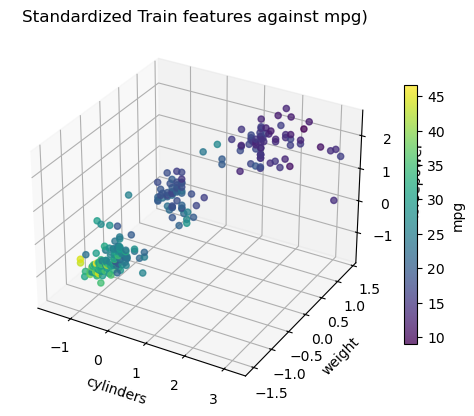

In [713]:
# --- 3D scatter of TRAIN (standardized) ---
# Assumes variables (change names if you used different ones):
# X_train_std: standardized training data
# y_train: y labels of training data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(
    scalingTrain[:, 0], scalingTrain[:, 1], scalingTrain[:, 2],
    c=y_train.ravel(), alpha=0.75
)

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title("Standardized Train features against mpg)")

fig.colorbar(p, shrink=0.7, label="mpg")
plt.show()

## 4. Linear Regression Model (40 Marks)

**Notation (shapes)**
- Let $m$ = #examples, $d$ = #features (**here $d=3$**).
- $X \in \mathbb{R}^{m\times d}$: standardized features (from `StandardScaler`).
- $\tilde{X} = [\mathbf{1} \mid X] \in \mathbb{R}^{m\times(d+1)}$: features **with a bias column** of 1s.
- $\theta \in \mathbb{R}^{(d+1)\times 1}$: parameters (first entry is the bias).
- $y \in \mathbb{R}^{m\times 1}$: targets (mpg).



**Hypothesis (prediction)**

$$
\hat{y} = \tilde{X}\,\theta
$$

Equivalently (separating bias and weights):

$$
\hat{y} = X\,w + b \quad\text{with}\quad \theta = \begin{bmatrix} b \\[2pt] w \end{bmatrix}.
$$



**Loss (MSE with 1/2)**

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\big(\hat y^{(i)} - y^{(i)}\big)^2
= \frac{1}{2m}\,\lVert \tilde{X}\theta - y \rVert_2^2
$$



**Gradient**

Let $r=\tilde{X}\theta - y$. Then

$$
\nabla_{\theta} J(\theta) = \frac{1}{m}\,\tilde{X}^\top(\tilde{X}\theta - y).
$$



**Batch Gradient Descent (BGD) update**

$$
\theta \leftarrow \theta \;-\; \alpha \cdot \frac{1}{m}\,\tilde{X}^\top(\tilde{X}\theta - y).
$$



Now that your data is ready, you should implement the gradient descent algorithm inside a class `LinearRegression`. The class should include the following methods:

- `__init__`: The constructor of the class. Set up the learning rate, convergence tolerance, random seed, and prepare variables to store weights, bias, gradients, and cost history.

- `initialize_parameters`: Initialize the model parameters (weights and bias) before training begins.

- `forward`: Take the input features and compute the predictions of the model.

- `compute_cost`: Compute the cost function using Mean Squared Error with a 1/2 factor. This value should be saved after each iteration.

- `backward`: Calculate the gradients of the cost function with respect to the weights and bias using the training data.

- `fit`: Train the model by running gradient descent for a fixed number of iterations (or until convergence). In each iteration call `forward`, `compute_cost`, `backward`, and then update the parameters. Also, keep track of the cost values and optionally plot them at the end.

- `predict`: Use the learned parameters to predict the output for new input data.

- `score` : Evaluate model performance on test data by returning a metric such as MSE.

**Deliverables**  
- Plot the training cost curve (MSE/2) against the number of iterations. 
- Report model performance on both train and test data (MSE).  


In [714]:
class LinearRegression:
    def __init__(self, n_features, learning_rate=0.01, seed=42):
        import numpy as np 
        """
        Parameters:
            n_features (int): Number of features (columns) in the input data.
            learning_rate (float): Step size for gradient descent updates.
            seed (int): Random seed for reproducible weight initialization.
        """
        self.alpha=learning_rate #set up the learning rate

        self.bias=0.0 #variable to store bias
        self.historyOfCost=[] #variable ot store cost history
        

        np.random.seed(seed) #set up random seed using np.random

        self.weights=np.random.randn(n_features)*0.001 #starting weight having a small value 

        #gradients
        self.to_store=[]
        for g in range(n_features):
            self.to_store.append(0.0)
        self.grad_wrt_weight=np.array(self.to_store) #numpy array of 0s to store graidents

        self.grad_wrt_bias=0.0

        self.converg_tolerance=0.0000001 #finally set up the tolerance


    def forward(self, X):
        """
        Parameters:
            X (numpy.ndarray): Input data of shape (m, n_features).

        Returns:
            numpy.ndarray: Predictions of shape (m,).
        """
        self.modelP=[]

        self.modelP=np.matmul(X,self.weights)+self.bias # formula is y=Xw+b , w=weights , b=bias, y=prediction
        self.modelPredicts=np.array(self.modelP)

        return self.modelPredicts


    def compute_cost(self, predictions):
        """
        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Returns:
            float: Mean squared error cost with 1/2 factor.
        """
        self.m=predictions.shape[0]

        self.formula_error=predictions-self.thisYtrain #this is the error --> (predicted-actual)
        self.formula_error_squared=(self.formula_error**2) #square up the error
        self.formula_sum=np.sum(self.formula_error_squared) #use the np sum to sum up all squared errors c

        self.valueOfCostFunction=(1/(2*self.m))*self.formula_sum #cost formula, just input values calculated above

        self.historyOfCost.append(self.valueOfCostFunction) #add to the cost history list here
        return self.valueOfCostFunction


    def backward(self, predictions):
        """
        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Updates:
            self.dW (numpy.ndarray): Gradient of weights, shape (n_features,).
            self.db (float): Gradient of bias.
        """

        self.m=self.thisXtrain.shape[0] #get number 
        transpose_Xtrain=self.thisXtrain.T #formula shows transpose needed

        self.error_for_grad=predictions-self.thisYtrain #this is the error

        self.total_error=np.sum(self.error_for_grad) #sum up the error
        self.numerator=np.matmul(transpose_Xtrain,self.error_for_grad) # this is X.(Xtheeta -y) , matrix multiplication

        #gradient of bias
        self.grad_wrt_bias=(1/self.m)*(self.total_error) 

        #gradient weights
        self.grad_wrt_weight=(1/self.m)*(self.numerator)

        print(self.grad_wrt_weight)


    def fit(self, X, y, iterations, plot_cost=False):

        """
        Parameters:
            X (numpy.ndarray): Training input data of shape (m, n_features).
            y (numpy.ndarray): Training labels of shape (m,) or (m,1).
            iterations (int): Number of gradient descent steps.
            plot_cost (bool, optional): Whether to plot the cost after training.

        Returns:
            self: Trained LinearRegression model.
        """
        self.thisYtrain=y.reshape(-1)
        self.thisXtrain=X
        print(X.shape,y.shape)
        
        #the functions above have calculated what we require for gradient descent, now just calling them here

        for iteration in range(iterations):

            pred_gradientDescent=self.forward(self.thisXtrain) #these are the predictions

            My_Jfunction=self.compute_cost(pred_gradientDescent) #this is the MSE

            self.backward(pred_gradientDescent) #these are the gradiemts




            

            self.bias=self.bias-self.alpha*self.grad_wrt_bias #update both parameters
            self.weights=self.weights-self.alpha*self.grad_wrt_weight
        

    def predict(self, X):
        """
        Parameters:
            X (numpy.ndarray): Input data of shape (m, n_features).

        Returns:
            numpy.ndarray: Predictions of shape (m,).
        """
        return self.forward(X) #



## 5. Evaluation (5 Marks)

After training your `LinearRegression` model, you should evaluate its performance:

1. **Plot the cost function**  
   - This shows how the cost (MSE/2) decreases over iterations.

2. **Report Mean Squared Error (MSE)**  
   - Compute and print the MSE for both the **training set** and the **test set**.  
   - This allows you to compare how well the model fits the training data and how well it generalizes to unseen data.

**Your train loss should be around 17.0 and test loss should be around 20.0**


(235, 3) (235, 1)
[6.29927768 6.37709403 6.70500462]
[6.29050729 6.36821925 6.69610789]
[6.28174892 6.35935662 6.68722333]
[6.27300255 6.35050614 6.67835092]
[6.26426817 6.34166778 6.66949065]
[6.25554576 6.33284154 6.66064248]
[6.24683531 6.32402738 6.65180642]
[6.2381368  6.3152253  6.64298244]
[6.22945021 6.30643529 6.63417053]
[6.22077552 6.29765731 6.62537066]
[6.21211273 6.28889136 6.61658283]
[6.2034618  6.28013742 6.60780702]
[6.19482274 6.27139548 6.5990432 ]
[6.18619551 6.26266551 6.59029137]
[6.17758011 6.25394751 6.58155151]
[6.16897652 6.24524145 6.5728236 ]
[6.16038472 6.23654731 6.56410762]
[6.1518047  6.22786509 6.55540356]
[6.14323643 6.21919476 6.5467114 ]
[6.13467991 6.21053632 6.53803113]
[6.12613512 6.20188973 6.52936273]
[6.11760204 6.193255   6.52070618]
[6.10908065 6.18463209 6.51206147]
[6.10057095 6.176021   6.50342858]
[6.09207291 6.1674217  6.49480749]
[6.08358651 6.15883419 6.48619819]
[6.07511175 6.15025845 6.47760066]
[6.0666486  6.14169445 6.46901489]
[6

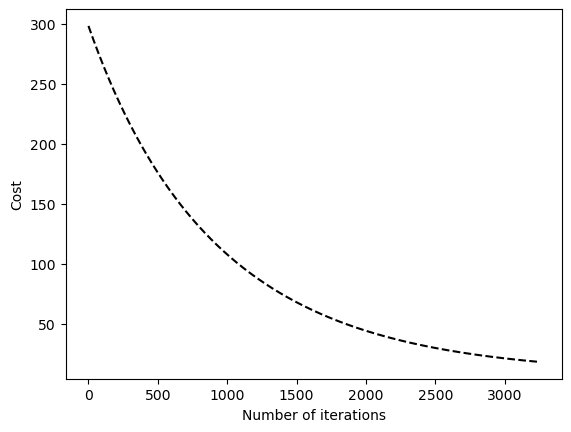

The Loss for training is:  18.140694123848274
The loss for Test is:  19.141797701495015


In [715]:
import matplotlib.pyplot as plt
# Hyperparameters
n_epochs = 3250
alpha    = 0.0005

# Train the model
lr = LinearRegression(n_features=3, learning_rate=alpha)
lr.fit(scalingTrain, y_train, n_epochs)




print(lr.historyOfCost)

# Plot cost curve (MSE/2 from training)
plt.plot(lr.historyOfCost, color='black', linestyle='dashed')
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()


# Evaluate on train data
pred=lr.predict(scalingTrain)
y_train=y_train.reshape(-1) 

training_samples=y_train.shape[0] #--> this is the value of "m" in the formula

error_ForMse=pred-y_train #--> errors value (predicted - actual)
squaredUp_errorForMse=(error_ForMse**2) #--> MSE wants error squared up so do that
sum_errorsSquaredUp=np.sum(squaredUp_errorForMse) #--> summation, adding all the squared errors
term1_formula=(1/(2*training_samples))
the_grandCherished_MSE=term1_formula*sum_errorsSquaredUp #--> actual MSE formula, but the summation and everything right to calculated already so just put

print("The Loss for training is: ", the_grandCherished_MSE) #--> printtttt


# Evaluate on test data
pred=lr.predict(scalingTest)
y_test=y_test.reshape(-1) 

training_samples=y_test.shape[0] #--> this is the value of "m" in the formula

error_ForMse=pred-y_test #--> errors value (predicted - actual)
squaredUp_errorForMse=(error_ForMse**2) #--> MSE wants error squared up so do that
sum_errorsSquaredUp=np.sum(squaredUp_errorForMse) #--> summation, adding all the squared errors
the_grandCherished_MSE=(1/(2*training_samples))*sum_errorsSquaredUp #--> actual MSE formula, but the summation and everything right to calculated already so just put
print("The loss for Test is: ",the_grandCherished_MSE) #--> printtt

# Print results


### Print the Learnt Model Weights 
Print the bias and model weights, we will use these for comparison later.

In [716]:
print("Learned weights (W):", lr.weights)
print("Learned bias (b):", lr.bias)

Learned weights (W): [-2.15214243 -2.17801281 -2.66178549]
Learned bias (b): 18.58223920583175


### Visualizing the Learnt Function - Another 3D Scatter plot
We will now plot the **learnt function** on the **standardized training features** in a 3D scatter plot. This is similar to the earlier feature plot we made, except we now superpose our learnt function on it. 
- The three axes correspond to the three selected features.  
- Each point represents a car in the dataset.  
- Points are **colored by mpg**, so we can visually inspect how fuel efficiency changes across feature space.  
- We see **diffused points** all across the 3D space now - their colors represent the mpg value your model **predicts** for that combination of the three features. So while we initially had a few real data points against their real mpg value, we now have a function that produces an mpg value against every possible data point (a data point being a specific combination of the features). This means that we have discovered or at least estimated the underlying unknown probability function itself that gives rise to the data - **that's the magical power of regression**!
- Your model is great if the predicted colors match the colors of the real data points in each region.

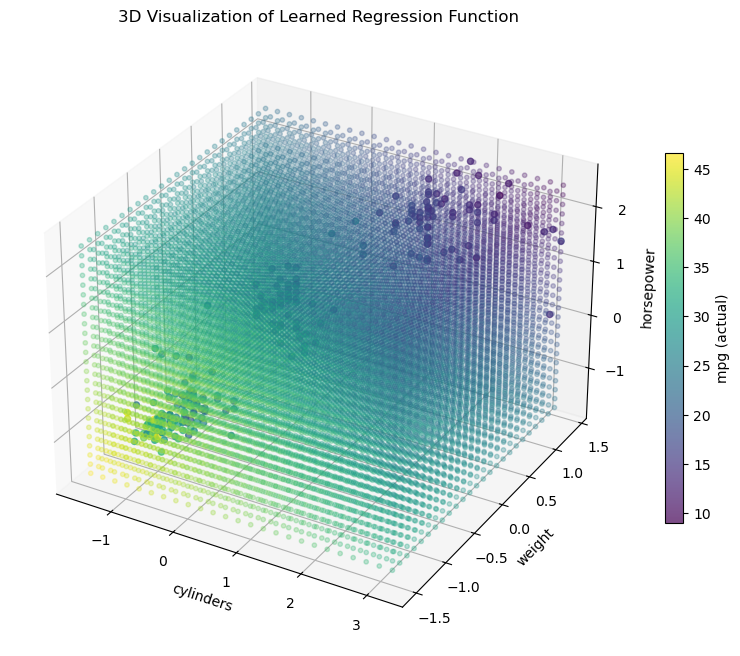

In [717]:
# Define feature ranges — smaller grid for fewer predicted points

# Variables (change names if you used different ones):
# X_train_std: standardized training data
# y_train: y labels of training data

x_range = np.linspace(scalingTrain[:, 0].min(), scalingTrain[:, 0].max(), 25)
y_range = np.linspace(scalingTrain[:, 1].min(), scalingTrain[:, 1].max(), 25)
z_range = np.linspace(scalingTrain[:, 2].min(), scalingTrain[:, 2].max(), 25)

# Create 3D grid for predictions
x_surf, y_surf, z_surf = np.meshgrid(x_range, y_range, z_range)
points = np.c_[x_surf.ravel(), y_surf.ravel(), z_surf.ravel()]
predicted = lr.predict(points).reshape(x_surf.shape)

# === Plot ===
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter all actual training data
p = ax.scatter(
    scalingTrain[:, 0], scalingTrain[:, 1], scalingTrain[:, 2],
    c=y_train.ravel(), cmap='viridis', alpha=0.7, label='Training data'
)

# Overlay sparse model predictions
ax.scatter(
    x_surf.ravel(), y_surf.ravel(), z_surf.ravel(),
    c=predicted.ravel(), cmap='viridis', alpha=0.3, s=10, label='Model predictions'
)

# Axis labels and title
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3D Visualization of Learned Regression Function')

# Colorbar on same scale as mpg
fig.colorbar(p, ax=ax, label='mpg (actual)', shrink=0.6)

plt.show()


# **Section 2** (30 Marks)

## Linear Regression using Scikit-learn (15 Marks)
We first fit an **Ordinary Least Squares (OLS)** linear regression model using `sklearn.LinearRegression`.  
The model is trained on the standardized training data, and the Mean Squared Error (MSE/2) is reported for both training and test sets.



In [718]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

Ordinary_Least_Squares_model=LinearRegression()

# Train Linear Regression model
Ordinary_Least_Squares_model.fit(scalingTrain, y_train)

# Predictions
Ordinary_Least_Squares_model.predict(scalingTrain)
Ordinary_Least_Squares_model.predict(scalingTest)

# Mean Squared Error
m_Informula=scalingTrain.shape[0]

myPredictions_train=Ordinary_Least_Squares_model.predict(scalingTrain)
for_trainError=myPredictions_train-y_train # --> this is the train error

myPredictions_test=Ordinary_Least_Squares_model.predict(scalingTest)
for_testError=myPredictions_test-y_test # --> this is the test error

squaring_train=(for_trainError**2) #--> square train error
squaring_test=(for_testError**2) #--> square test error

summing_test=np.sum(squaring_test) #--> add all the squared test errors
summing_train=np.sum(squaring_train) #--> add all the squared train errors

constantOfFormula=(1/m_Informula)

MSE_test=constantOfFormula*summing_test #--> MSE for the test set
MSE_train=constantOfFormula*summing_train #--> MSE for the train set

print(MSE_train)
print(MSE_test)


15.12593648531694
14.753322439859403


## Ridge Regression (5 Marks)

Next, we apply **Ridge Regression** (L2 regularization).  
Use the `mean_squared_error` to find loss and print it. Also plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Ridge.

Alpha value, Train Loss, Test Loss: 
 
0.1 ,  7.5629728300044725 ,  11.041918918682184
1 ,  7.563401125997413 ,  11.0456189598018
2 ,  7.564596064305754 ,  11.049557808017042
3 ,  7.566420560672637 ,  11.053305530610396
4 ,  7.568767590306654 ,  11.056858292442127
5 ,  7.571550284743771 ,  11.060216860663271
10 ,  7.589921493198649 ,  11.07430172013072
20 ,  7.637313004247237 ,  11.09249313018049
30 ,  7.690375509838297 ,  11.104049336729162
40 ,  7.74696303016317 ,  11.11421364262271
50 ,  7.806984616756337 ,  11.125873893271848
100 ,  8.161277387545935 ,  11.239871242812676
200 ,  9.080135388450199 ,  11.741229034489637
300 ,  10.125849188763684 ,  12.44930225466932
400 ,  11.18439992627316 ,  13.230753689677694
500 ,  12.202732052138156 ,  14.017860268508908
1000 ,  16.309353069819178 ,  17.375574034970473
1100 ,  16.946924123912353 ,  17.913262994774165
1200 ,  17.534696046783537 ,  18.411669927993774
1300 ,  18.077524787432473 ,  18.874074455006415
1400 ,  18.57984156294072 ,  19.

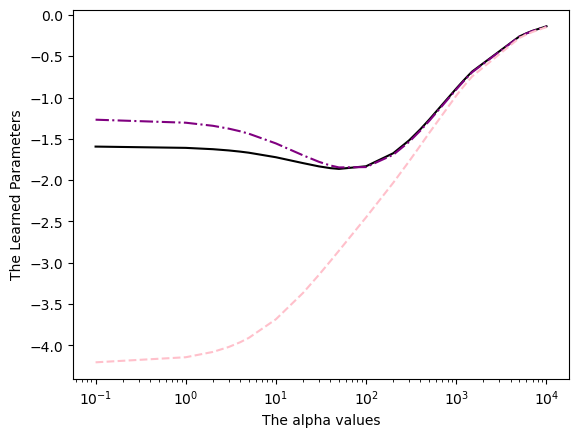

In [719]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


theetha_storeList=[]
values_of_alpha=[0.1,1,2,3,4,5,10,20,30,40,50,100,200,300,400,500,1000,1100,1200,1300,1400,1500,5000,6000,7000,10000]
print("Alpha value, Train Loss, Test Loss: ")
print(" ")


for the_alphas in values_of_alpha:

    ridgeRegression_model=Ridge(the_alphas) #--> created a ridge model, for every alpha per loop a new one will be made 

    ridgeRegression_model.fit(scalingTrain,y_train) #--> use the fit func provided by sklearn

    myTest_pred=ridgeRegression_model.predict(scalingTest) #--> get the predicitons for test
    for_myTestError=myTest_pred-y_test

    myTrain_pred=ridgeRegression_model.predict(scalingTrain) #--> get the predictions for train
    for_myTrainError=myTrain_pred-y_train

    mean_squareTest=mean_squared_error(y_test,myTest_pred)/2 #--> cost function direct (divided by 2 as well)
    mean_squareTrain=mean_squared_error(y_train,myTrain_pred)/2 #--> cost function direct (divided by 2 as well)

    #theetha_storeList=[]
    theetha_storeList.append(ridgeRegression_model.coef_) #--> store the learnt theeta

    
    print(the_alphas,", ", mean_squareTrain,", ", mean_squareTest)

print(theetha_storeList)

theetha_1=[] #-->this stores all the values of theeta1 across all alpha values
theetha_2=[] #-->this stores all the values of theeta2 across all alpha values
theetha_3=[] #-->this stores all the values of theeta3 across all alpha values

for vals in theetha_storeList: #-->loop through and append accordingly
    theetha_1.append(vals[0])
    theetha_2.append(vals[1])
    theetha_3.append(vals[2])

plt.plot(values_of_alpha,theetha_1,color='black',linestyle='solid') #-->plot each line for each theetha(3 in total)
plt.plot(values_of_alpha,theetha_2,color='purple',linestyle='dashdot')
plt.plot(values_of_alpha,theetha_3,color='pink',linestyle='--')

plt.xscale('log')
plt.ylabel("The Learned Parameters")
plt.xlabel("The alpha values")
plt.show()









## Lasso Regression (5 Marks)

Finally, we apply **Lasso Regression** (L1 regularization).  

Use the `mean_squared_error` to find loss and print it. Also plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Lasso.

Alpha value, Train Loss, Test Loss: 
 
0.1 ,  7.568462780802535 ,  10.981223682596571
1 ,  8.111079720703849 ,  10.928516132621079
2 ,  9.75519750448553 ,  11.895489385085238
3 ,  12.495189852930352 ,  13.942017157453483
4 ,  16.24920530624157 ,  17.037994457290417
5 ,  20.74920530624157 ,  20.99205442594603
10 ,  30.721367134449977 ,  29.992232269263262
20 ,  30.721367134449977 ,  29.992232269263262
30 ,  30.721367134449977 ,  29.992232269263262
40 ,  30.721367134449977 ,  29.992232269263262
50 ,  30.721367134449977 ,  29.992232269263262
100 ,  30.721367134449977 ,  29.992232269263262
200 ,  30.721367134449977 ,  29.992232269263262
300 ,  30.721367134449977 ,  29.992232269263262
400 ,  30.721367134449977 ,  29.992232269263262
500 ,  30.721367134449977 ,  29.992232269263262
1000 ,  30.721367134449977 ,  29.992232269263262
1100 ,  30.721367134449977 ,  29.992232269263262
1200 ,  30.721367134449977 ,  29.992232269263262
1300 ,  30.721367134449977 ,  29.992232269263262
1400 ,  30.72136713

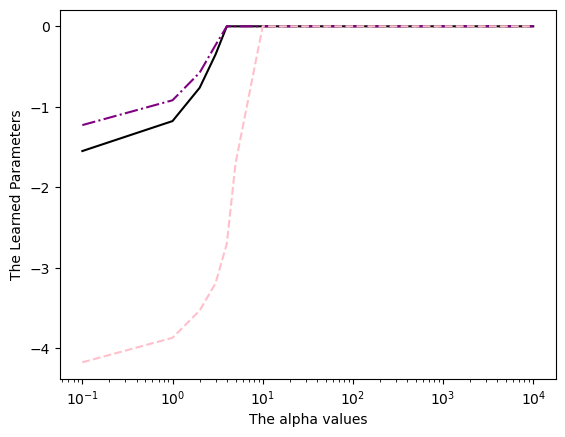

In [720]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

theetha_storeList=[]
values_of_alpha=[0.1,1,2,3,4,5,10,20,30,40,50,100,200,300,400,500,1000,1100,1200,1300,1400,1500,5000,6000,7000,10000]
print("Alpha value, Train Loss, Test Loss: ")
print(" ")


for alp_values in values_of_alpha:
    
    myLasso_regressionModel=Lasso(alp_values) #--> a lasso model every loop for each alpha( new one every time)

    myLasso_regressionModel.fit(scalingTrain,y_train) #--> this func trains the model

    predictions_forTrain=myLasso_regressionModel.predict(scalingTrain) #--> get the predictions for both train and test
    predictions_forTest=myLasso_regressionModel.predict(scalingTest)

    myCostforTrain=mean_squared_error(y_train,predictions_forTrain)/2 #--> the Cost functions for both train and test
    myCostforTest=mean_squared_error(y_test,predictions_forTest)/2

    theetha_storeList.append(myLasso_regressionModel.coef_) #--> store the coeffecient (the learned weight) for each
    

    print(alp_values,", ",myCostforTrain,", ",myCostforTest)


theetha_1=[] #-->this stores all the values of theeta1 across all alpha values
theetha_2=[] #-->this stores all the values of theeta2 across all alpha values
theetha_3=[] #-->this stores all the values of theeta3 across all alpha values

for vals in theetha_storeList: #-->loop through and append accordingly
    theetha_1.append(vals[0])
    theetha_2.append(vals[1])
    theetha_3.append(vals[2])

plt.plot(values_of_alpha,theetha_1,color='black',linestyle='solid') #-->plot each line for each theetha(3 in total)
plt.plot(values_of_alpha,theetha_2,color='purple',linestyle='dashdot')
plt.plot(values_of_alpha,theetha_3,color='pink',linestyle='--')

plt.xscale('log')
plt.ylabel("The Learned Parameters")
plt.xlabel("The alpha values")
plt.show()












## Comparison on Coefficients - Regularized vs. Non-Regularized (5 Marks)
a) Explain what the Ridge and Lasso parameter graphs show. 

b) Briefly discuss the difference between the model coefficients (weights) of your initial model and the regularized models. How and why are they different?

#### Answer Here:


"a Both graphs have one thing in common, as the values of alpha are increased we see the weights heading towards zero which is the expected result in case of there being a large coeffecient. However, a smooth divergence towards 0 is seen in the Ridge Regression and for Lasso Regression we see an abrupt fall to exact 0. The trend however is similar, both head towards 0, as alpha becomes large.

The learned weights for the ordinary model do not shrink and for me they are around -2, but for the regularised ones as seen in the graph eventually reach 0. They are different because the Ridge and Lasso apply another term in the formula which acts as a penalty for large coeffecients. No such thing exists for the normal Linear regression.